In [ ]:
from detectlib.features import get_samples, get_hog_features, convert_color
from detectlib.tracker import CarTracker
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import cv2
import numpy as np
%matplotlib inline

In [ ]:
imgs, labels = get_samples()

In [ ]:
## Visualize some example

In [ ]:
c=0
plt.figure(figsize=(12,12))
for img,label in list(zip(imgs,labels))[:25]:
    img = mpimg.imread(img)
    plt.subplot(5,5,c+1)
    plt.imshow(img)
    c+=1

plt.tight_layout()
plt.savefig('../output_images/random_samples.png')

## Visualize HOG

In [ ]:
c=0

for img,label in list(zip(imgs,labels))[20:25]:
    c+=1
    plt.figure(figsize=(12,12))
    img = mpimg.imread(img)
    
    feat_img = convert_color(img)
    for ch in range(3):
        plt.subplot(2,3,1+ch)
        plt.imshow(feat_img[:,:,ch],cmap='gray')
        plt.title('YCrCb channel {}'.format(ch))
        f, hog_img = get_hog_features(feat_img[:,:,ch],9,8,2,vis=True)
        plt.subplot(2,3,4+ch)
        plt.title('Hog channel {}'.format(ch))
        plt.imshow(hog_img,cmap='gray')
        
        
    plt.tight_layout(pad=.8)
    plt.savefig('../output_images/hog_{}.png'.format(c))

(720, 1280) 13.0
2132
20911
312
456
N cars detected =2
13.0


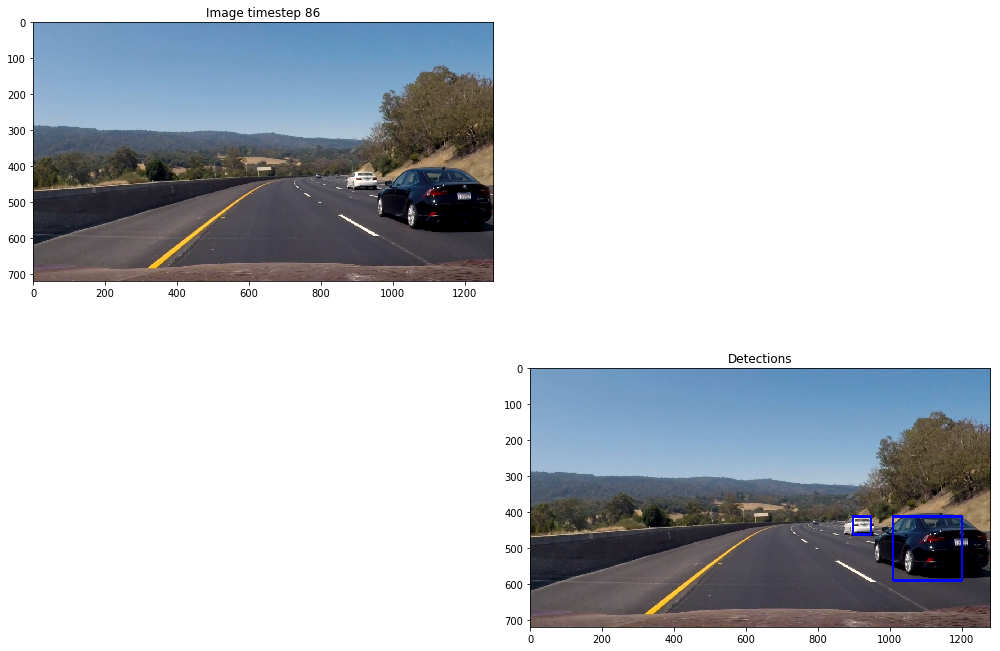

(720, 1280, 2) 13.0
30925
2409
N cars detected =2
13.0


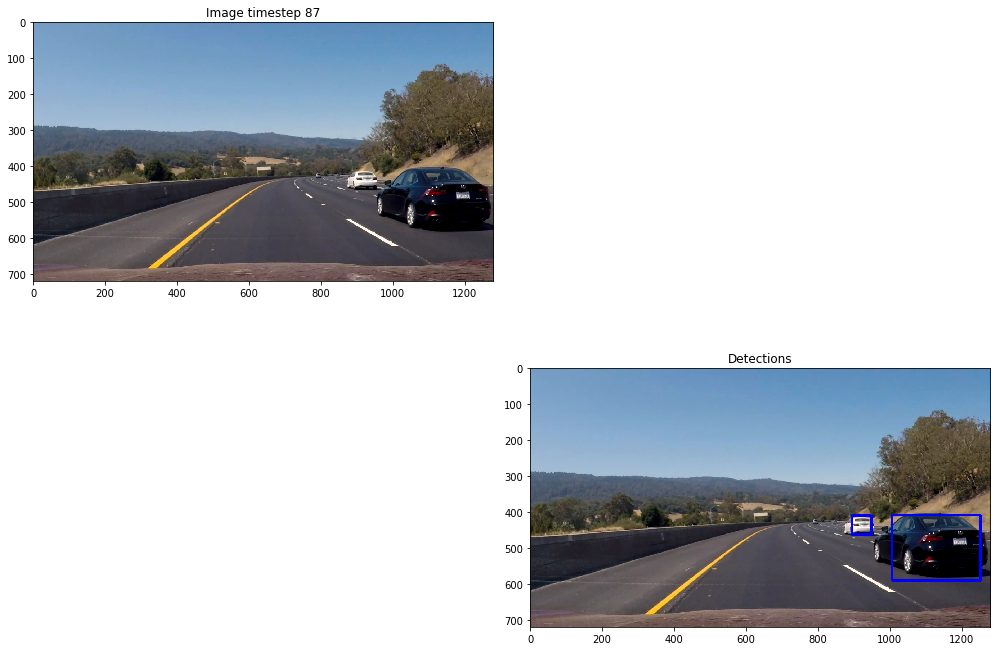

(720, 1280, 3) 13.0
41947
3247
N cars detected =2
12.0


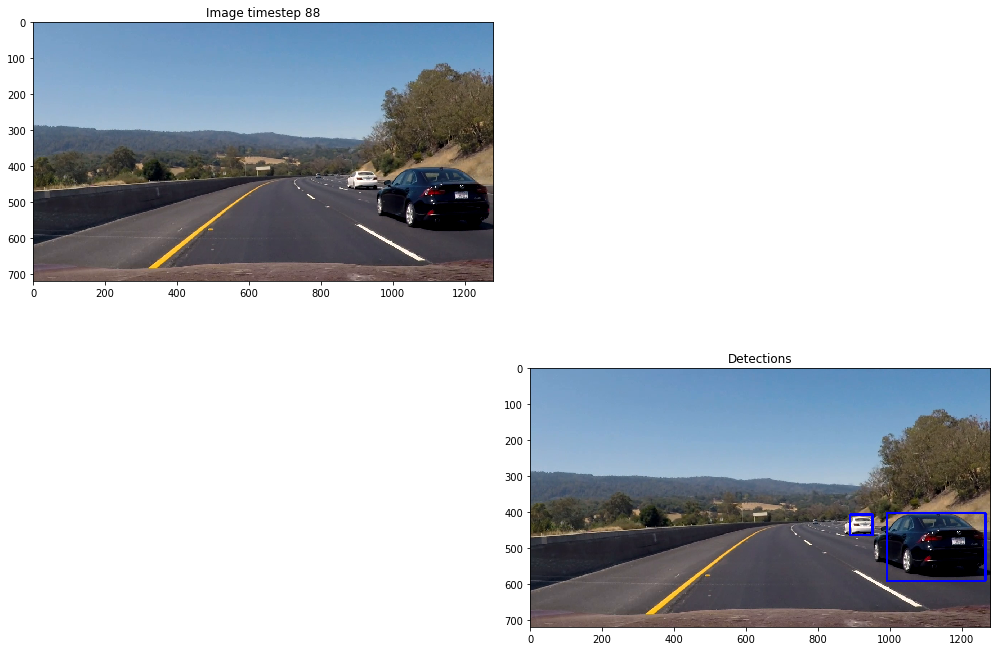

(720, 1280, 4) 15.0
46545
1572
4065
N cars detected =2
15.0


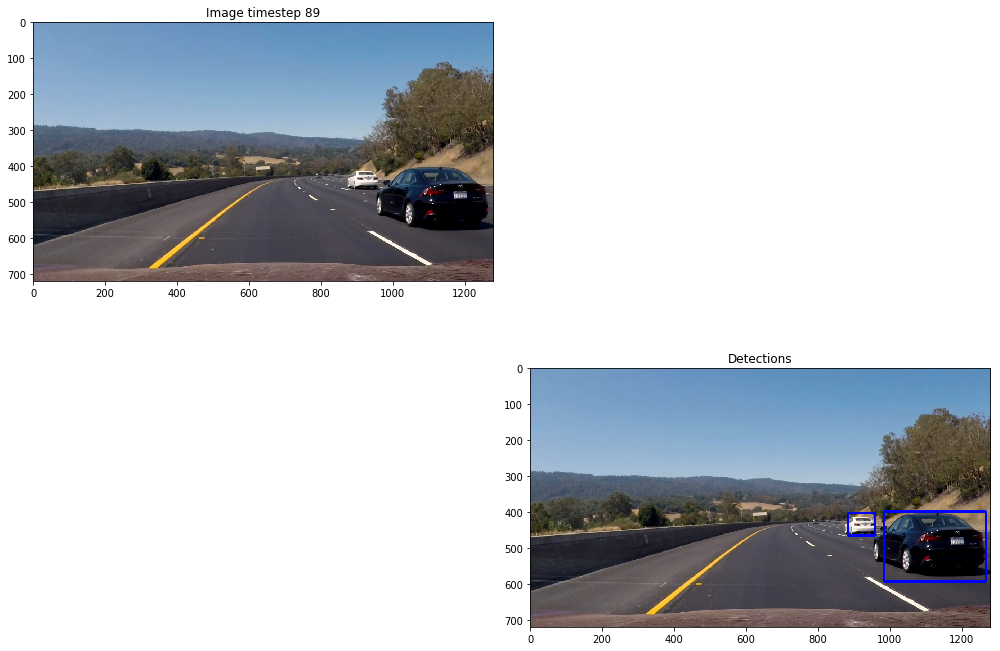

(720, 1280, 4) 13.0
46734
4499
114
N cars detected =2
12.0


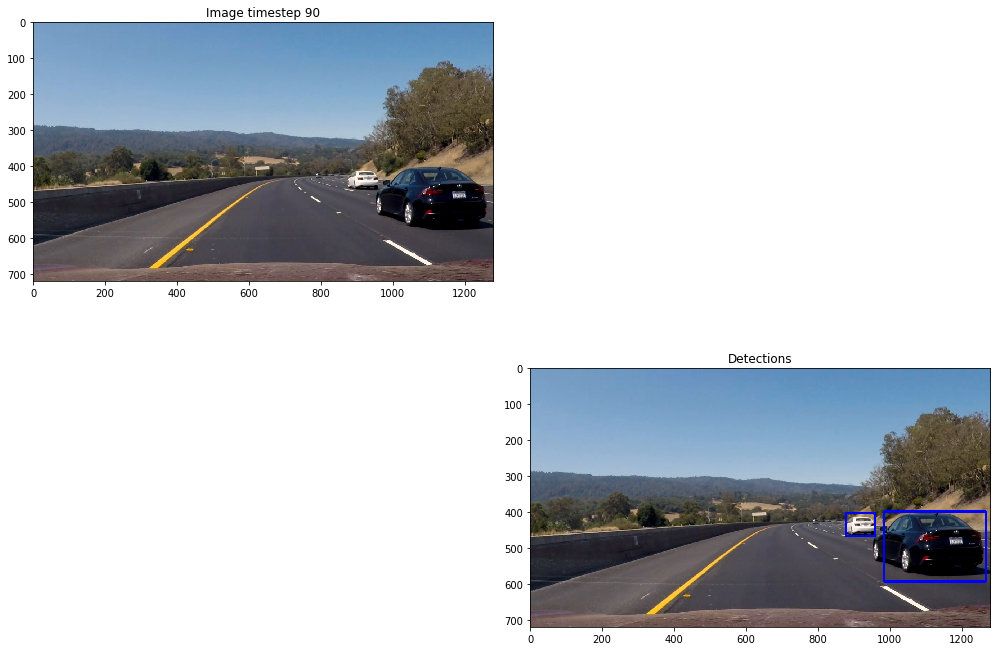

(720, 1280, 4) 13.0
45724
3813
N cars detected =2
8.0


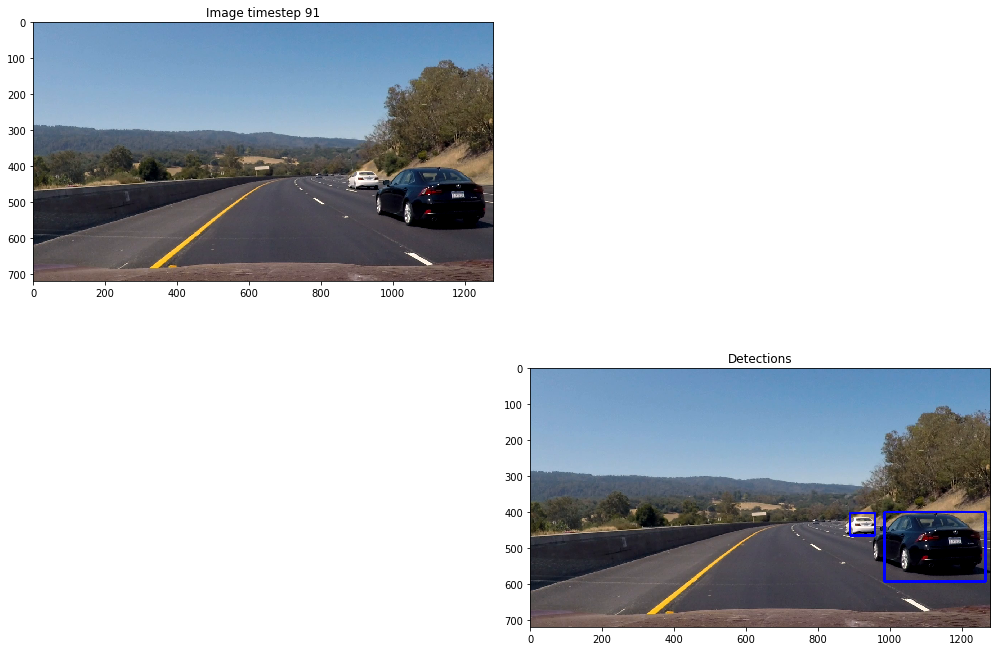

(720, 1280, 4) 13.0
46183
4192
N cars detected =2
10.0


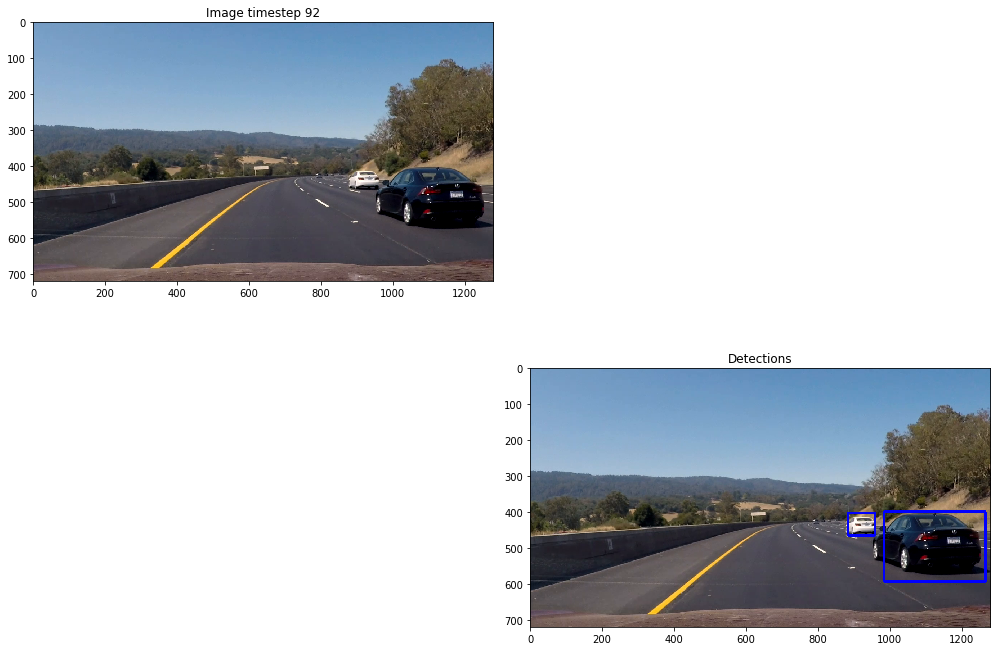

(720, 1280, 4) 13.0
46225
4192
N cars detected =2
11.0


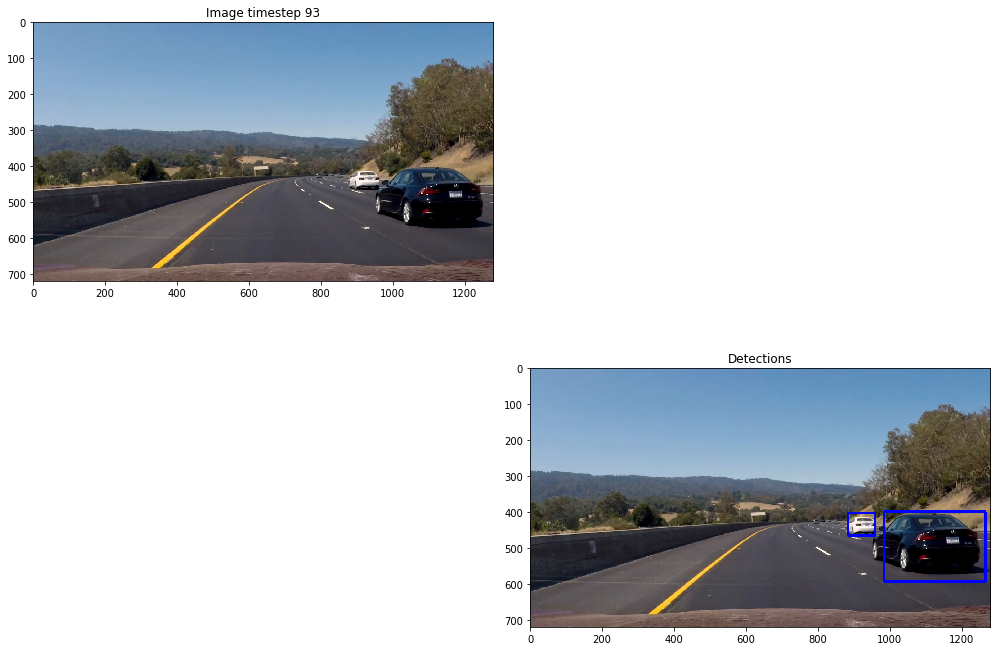

(720, 1280, 4) 13.0
45014
3982
N cars detected =2
10.0


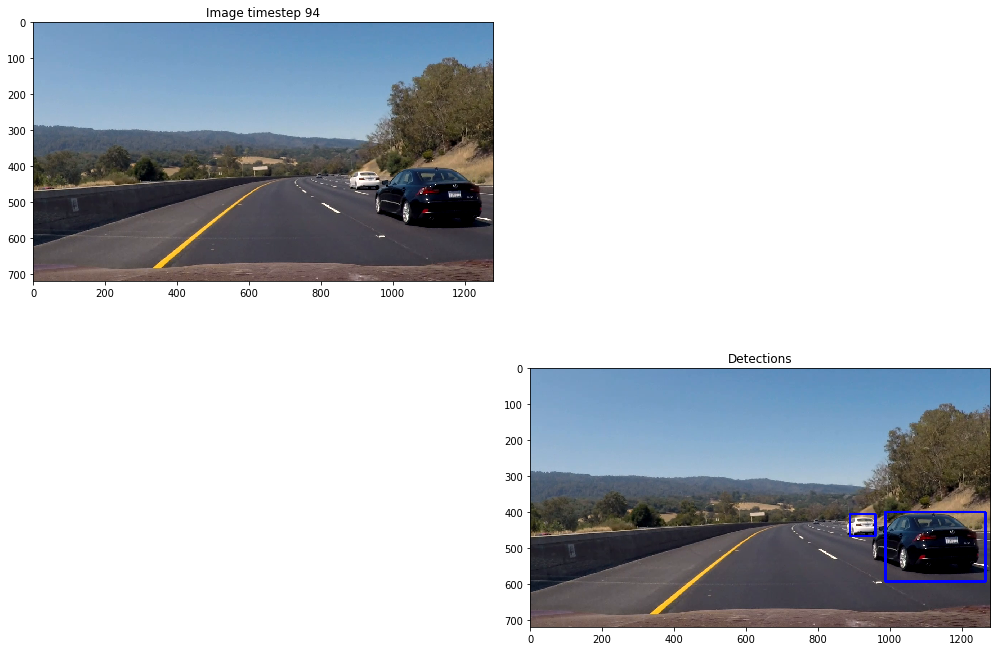

(720, 1280, 4) 13.0
45923
3824
N cars detected =2
10.0


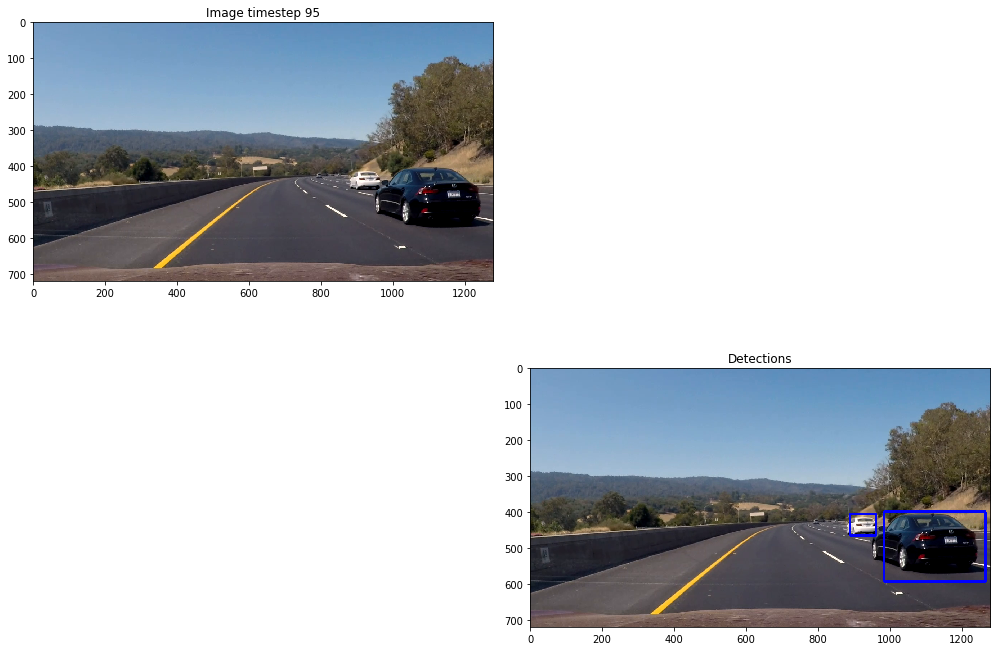

(720, 1280, 4) 13.0
46058
5087
N cars detected =2
12.0


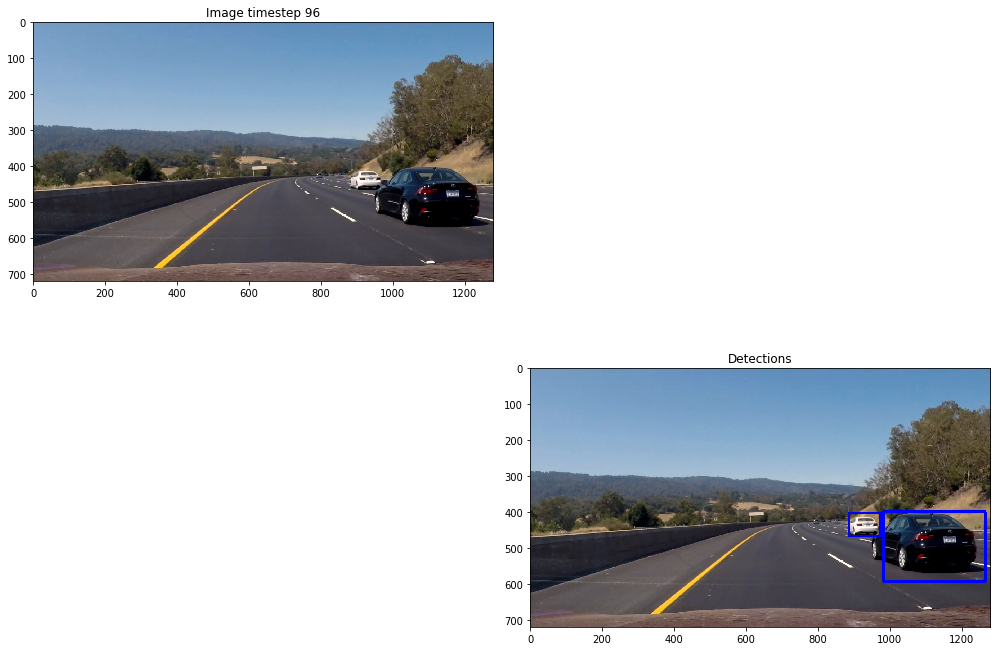

(720, 1280, 4) 13.0
46567
5435
N cars detected =2
9.0


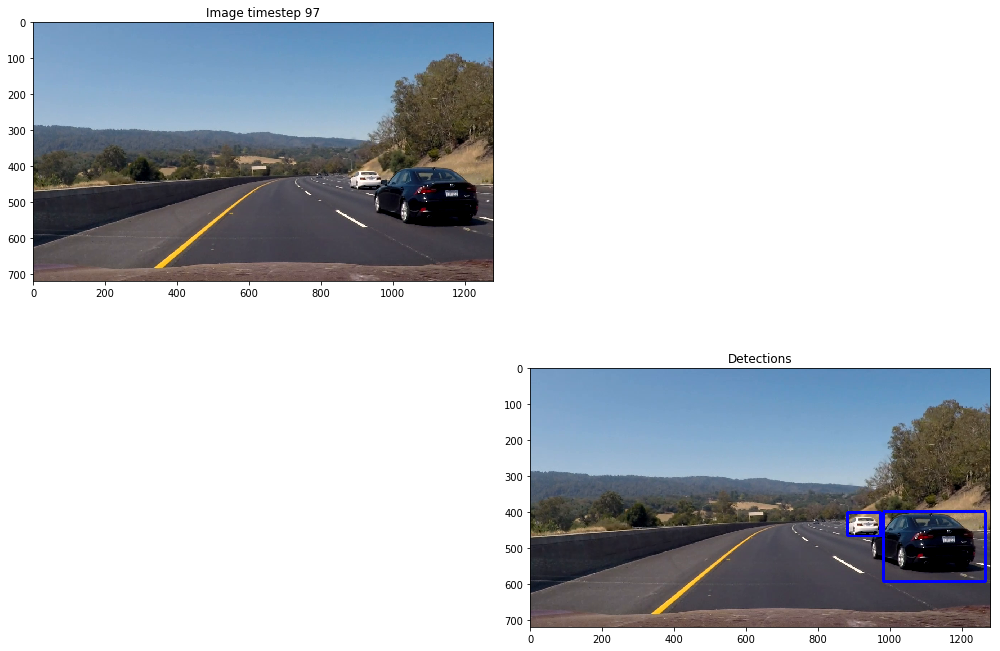

(720, 1280, 4) 13.0
44732
4115
N cars detected =2
11.0


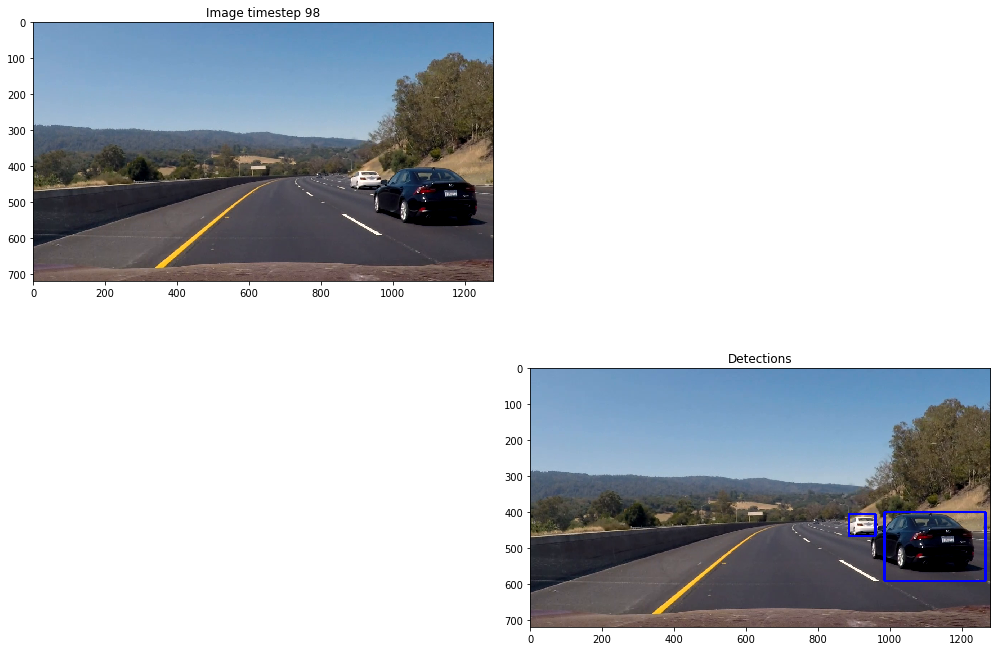

(720, 1280, 4) 13.0
44873
4115
N cars detected =2
11.0


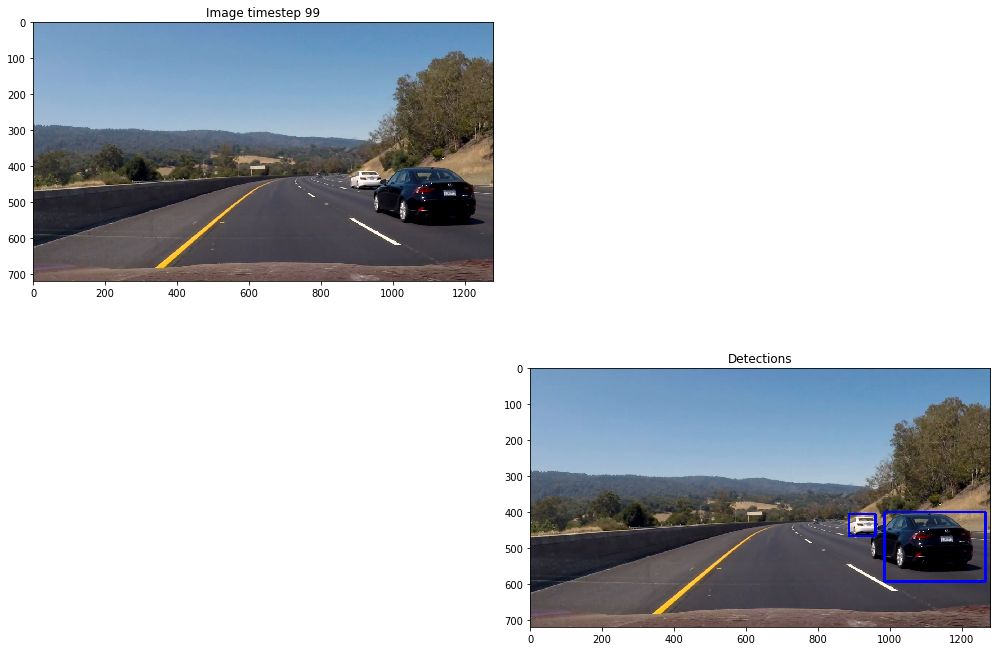

(720, 1280, 4) 17.0
45819
4369
N cars detected =2
17.0


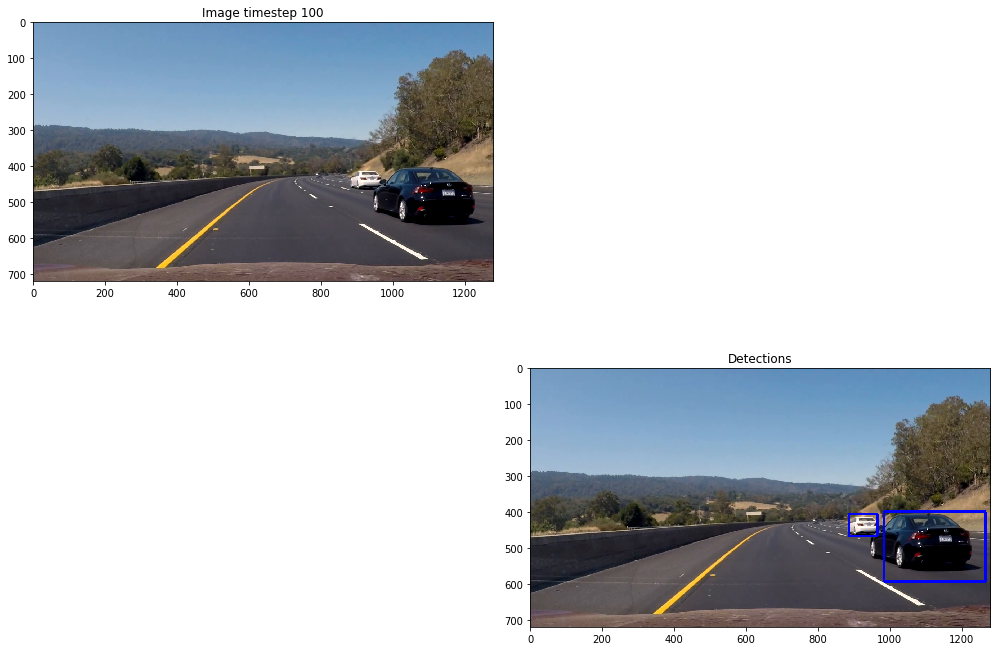

(720, 1280, 4) 13.0
45684
4114
N cars detected =2
12.0


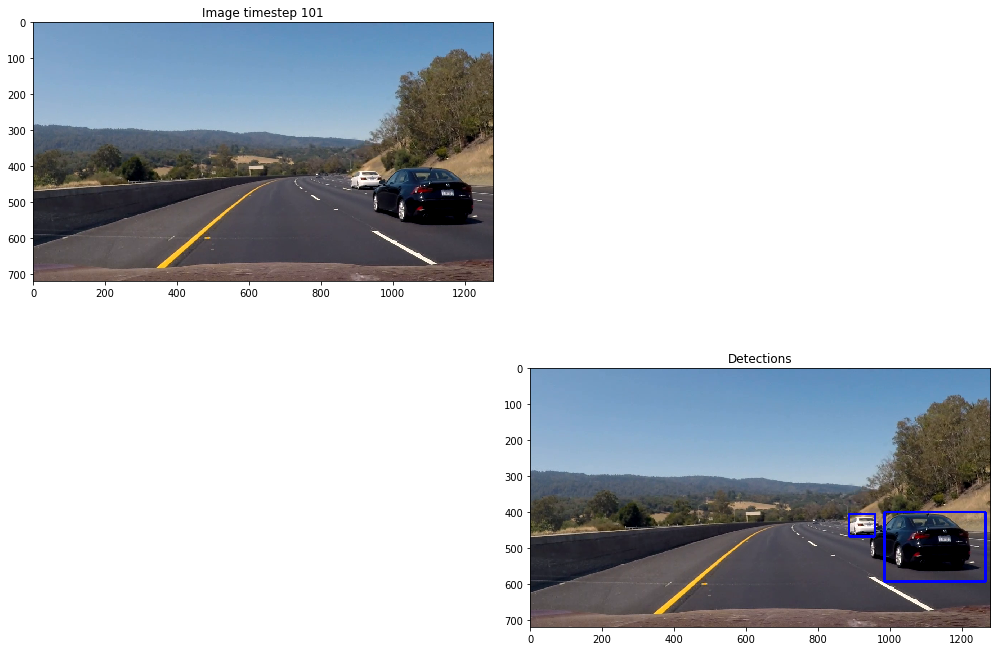

(720, 1280, 4) 13.0
44850
4810
N cars detected =2
13.0


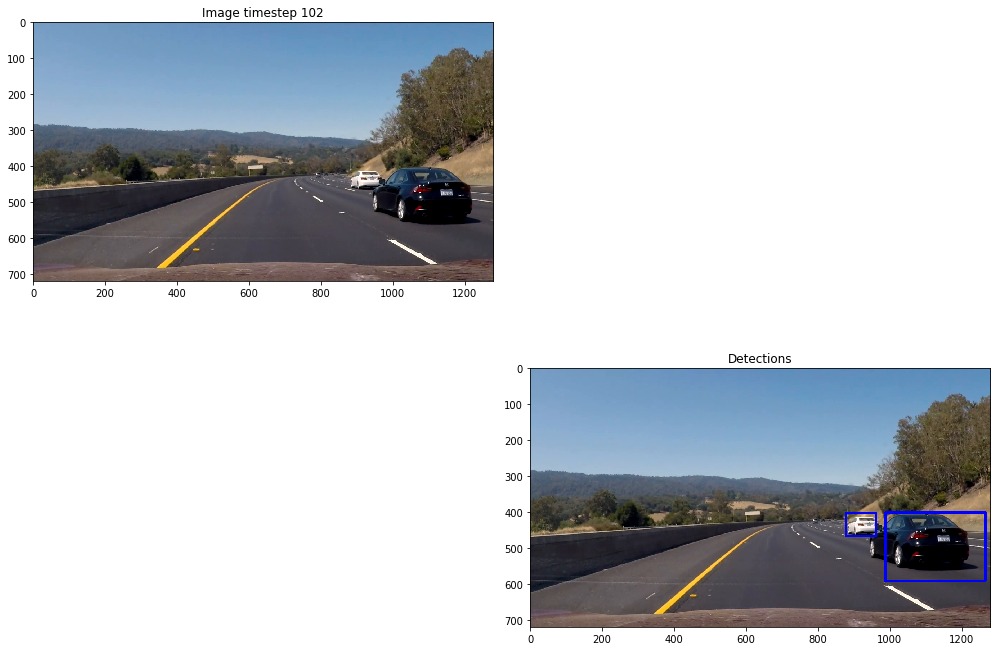

(720, 1280, 4) 13.0
44668
4866
N cars detected =2
12.0


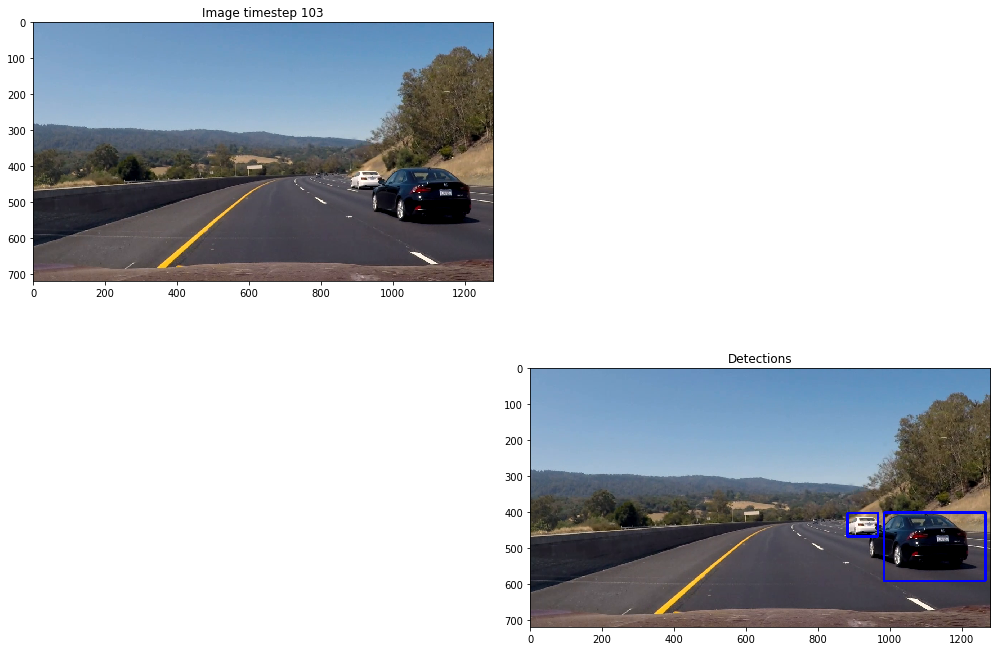

(720, 1280, 4) 16.0
53129
N cars detected =1
16.0


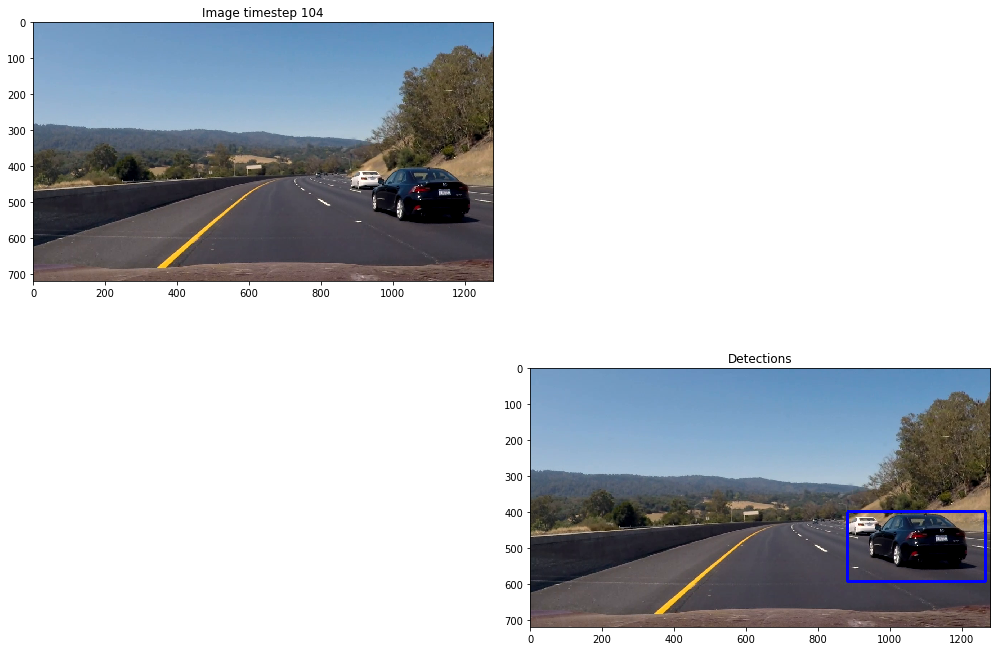

(720, 1280, 4) 13.0
51406
N cars detected =1
11.0


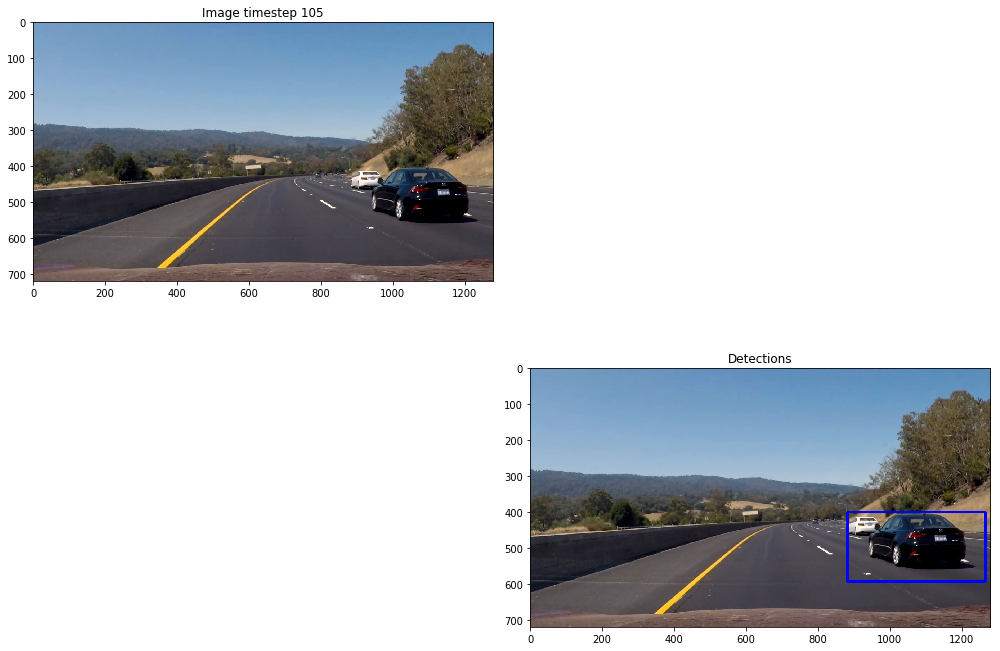

In [5]:

tracker = CarTracker('../model.p',
                    nsteps=3,
                    threshold=4,
                    scales = [0.8, 1.5, 3, 4],
                    minsize_detection_close = 1000
                    )


count = 0
for i in range(86,86+20):

    img = mpimg.imread('../short_video_frames/frame%03d.png'%i)
    
    img*=255
    img = img.astype(np.uint8)
    assert img.max() == 255
    
    heat = tracker.get_current_heatmap(img)
    heat_integrated = tracker._integrate_heatmap(heat.copy())
    res = tracker._treshold_and_label(img, heat_integrated)
    
    print(heat.max())
    fig = plt.figure(figsize=(14, 10))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
#     plt.suptitle('Timestep {}'.format(i))
    plt.subplot(221)
    plt.imshow(img)
    plt.title('Image timestep {}'.format(i))
    plt.subplot(222)
    plt.imshow(heat)
    plt.title('Heatmap')
    plt.subplot(223)
    
    plt.imshow(heat_integrated)
    plt.title('Heatmap Integrated & Smoothed')
    plt.subplot(224)
    plt.imshow(res)
    plt.title('Detections')
    plt.tight_layout()
    plt.savefig('../output_images/pipeling_{}.png'.format(i-86))
    plt.show()